# Assignment 2

## Exploring and Preprocessing Data with Pandas and Scikit-Learn

<b> Submitted by: Shivani Naik </b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

%matplotlib inline
sns.set(style='darkgrid')


In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
"Petal Length", "Petal Width",
"Name"])

### 1.1 Summary Statistics

In [3]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.dtypes

Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
Name             object
dtype: object

There are 4 features and all have float (numeric) data type.

Let us see the summary statistics for all of these 4 features

In [6]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Observations:
- There are 4 features
    - Sepal Length
    - Sepal Width
    - Petal Length
    - Petal Length
- All features are numeric (float)
- There are no missing values
- There are 150 total instances
- The table shows different summary statistics



### 1.2 Data Visualisation

#### 1.2.1 Histograms

<Figure size 1080x576 with 0 Axes>

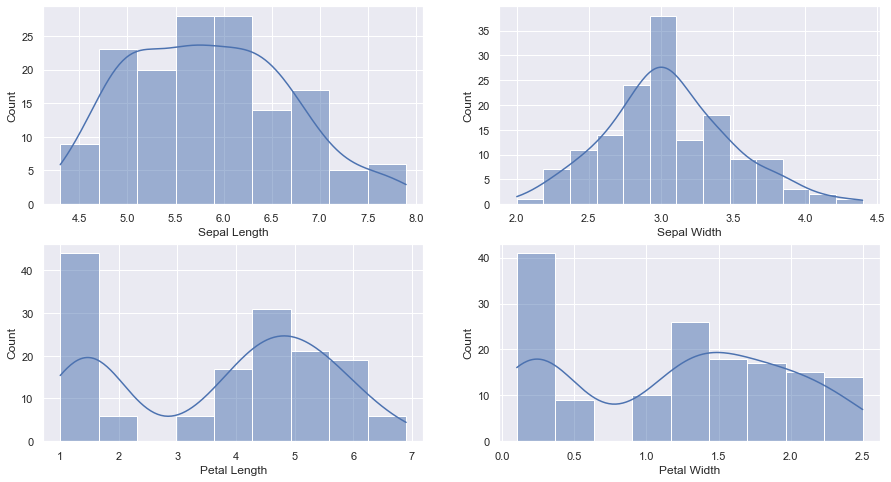

In [7]:
fig = plt.figure(figsize=(15,8))
fig, ax = plt.subplots(2,2,figsize=(15,8) );
sns.histplot(ax=ax[0,0], x = df['Sepal Length'], kde = True);
sns.histplot(ax=ax[0,1], x = df['Sepal Width'], kde = True);
sns.histplot(ax=ax[1,0], x = df['Petal Length'], kde = True);
sns.histplot(ax=ax[1,1], x = df['Petal Width'], kde = True);

We can see the distribution of all numeric features with the histograms above

#### 1.2.2 Box Plots

<AxesSubplot:>

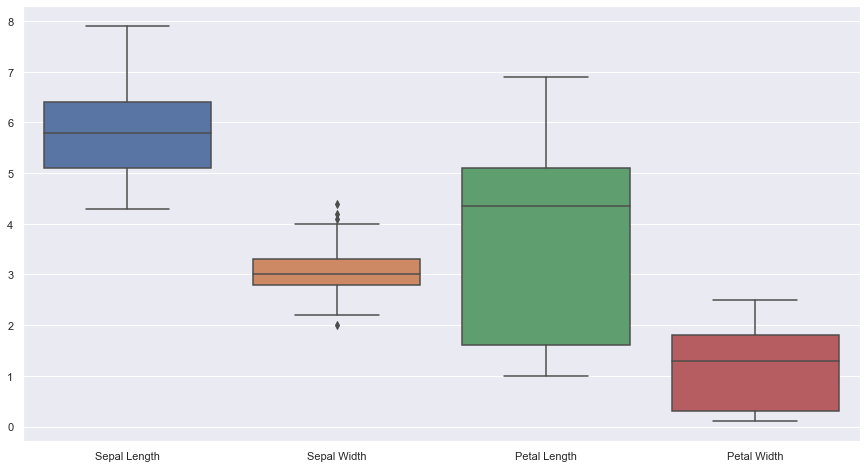

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

<b>Observations</b>
- Sepal length has higher median of 5.8
- Variation of data is higher in Petal Length
- Sepal Width has some outliers, whereas there are no outliers in other features
- Petal length is highly left-skewed (negative- skewed)

## Ames, Iowa dataset

In [9]:
import pandas as pd
pd.set_option("display.max_columns", 100)
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/AmesHousing.txt"
iowa_df = pd.read_csv(url, sep="\t")

-  There are 2930 instances with 81 features

In [10]:
iowa_df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,

Let's see the columns in the dataset. We have 82 columns and 2930 rows.

In [11]:
iowa_df.columns, len(iowa_df.columns)

(Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
        'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
        'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
        'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
        'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
        'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
        'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
        'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
        '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
        'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
        'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
        'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Y

Let's check the unique data types for all features

In [12]:
set(iowa_df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

The features have one of the following data types - float, int, object

## 2.1 Missing Values Inputation

### 2.1.1 Number of features with missing values

Following 27 columns have missing values

In [13]:
missing_count = iowa_df.isnull().sum()
missing_columns = missing_count[missing_count > 0]
missing_columns

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

#### Getting numeric and nominal column names

In [14]:
numeric_columns = iowa_df.select_dtypes(include=np.number).columns.to_list()
nominal_columns = iowa_df.select_dtypes(include=["object"]).columns.to_list()
len(numeric_columns), len(nominal_columns)

(39, 43)

In [15]:
#Even though these columns are numeric, they are still categorical as they are mapped to discrete values
nominal_columns += ['MS SubClass', 'Overall Qual', 'Overall Cond',
                    'Year Built','Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']
#Also remove the y variable (target) 'Sale Price' as it is not a feature
numeric_columns = [x for x in numeric_columns if x not in ['Order', 'PID', 'MS SubClass', 'Overall Qual', 
                                                           'Overall Cond','Year Built',
                                                           'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold','SalePrice']]

In [16]:
len(numeric_columns), len(nominal_columns)

(28, 51)

In [17]:
iowa_df[nominal_columns]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,MS SubClass,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Garage Yr Blt,Mo Sold,Yr Sold
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal,20,6,5,1960,1960,1960.0,5,2010
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,20,5,6,1961,1961,1961.0,6,2010
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,20,6,6,1958,1958,1958.0,6,2010
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20,7,5,1968,1968,1968.0,4,2010
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,60,5,5,1997,1998,1997.0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,80,6,6,1984,1984,1984.0,3,2006
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,20,5,5,1983,1983,1983.0,6,2006
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,85,5,5,1992,1992,NaN,7,2006
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20,5,5,1974,1975,1975.0,4,2006


In [18]:
iowa_df[nominal_columns]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,MS SubClass,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Garage Yr Blt,Mo Sold,Yr Sold
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal,20,6,5,1960,1960,1960.0,5,2010
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,20,5,6,1961,1961,1961.0,6,2010
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,20,6,6,1958,1958,1958.0,6,2010
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20,7,5,1968,1968,1968.0,4,2010
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,60,5,5,1997,1998,1997.0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,80,6,6,1984,1984,1984.0,3,2006
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,20,5,5,1983,1983,1983.0,6,2006
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,85,5,5,1992,1992,NaN,7,2006
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20,5,5,1974,1975,1975.0,4,2006


In [19]:
#Missing nominal columns
(iowa_df[nominal_columns].isnull().sum() > 0).index

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition', 'MS SubClass', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt',
       'Mo Sold', 'Yr Sold'],
      dtype='object')

### 2.1.2 Fill missing nominal features with 'Missing'

In [20]:
iowa_df[nominal_columns] = iowa_df[nominal_columns].fillna('Missing')
iowa_df[nominal_columns]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,MS SubClass,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Garage Yr Blt,Mo Sold,Yr Sold
0,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,Missing,Missing,Missing,WD,Normal,20,6,5,1960,1960,1960.0,5,2010
1,RH,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal,20,5,6,1961,1961,1961.0,6,2010
2,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Gar2,WD,Normal,20,6,6,1958,1958,1958.0,6,2010
3,RL,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,Missing,Missing,Missing,WD,Normal,20,7,5,1968,1968,1968.0,4,2010
4,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal,60,5,5,1997,1998,1997.0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,Missing,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Missing,Detchd,Unf,TA,TA,Y,Missing,GdPrv,Missing,WD,Normal,80,6,6,1984,1984,1984.0,3,2006
2926,RL,Pave,Missing,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal,20,5,5,1983,1983,1983.0,6,2006
2927,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Missing,Missing,Missing,Missing,Missing,Y,Missing,MnPrv,Shed,WD,Normal,85,5,5,1992,1992,Missing,7,2006
2928,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal,20,5,5,1974,1975,1975.0,4,2006


In [21]:
#Check missing values
iowa_df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

### 2.1.3 Fill missing numeric features with linear interpolation

In [22]:
iowa_df[numeric_columns]

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,141.0,31770,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0
1,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0
2,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500
3,93.0,11160,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0
4,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,2.0,588.0,120,0,0,0,0,0,0
2926,NaN,8885,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,2.0,484.0,164,0,0,0,0,0,0
2927,62.0,10441,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,0,700
2928,77.0,10010,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,2.0,418.0,240,38,0,0,0,0,0


In [23]:
#Fill missing values
iowa_df[numeric_columns] = iowa_df[numeric_columns].interpolate(method='linear')

In [24]:
iowa_df[numeric_columns]

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,141.0,31770,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0
1,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0
2,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500
3,93.0,11160,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0
4,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,2.0,588.0,120,0,0,0,0,0,0
2926,49.5,8885,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,2.0,484.0,164,0,0,0,0,0,0
2927,62.0,10441,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,0,700
2928,77.0,10010,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,2.0,418.0,240,38,0,0,0,0,0


We have now imputed all missing values, numeric and nominal

In [25]:
#Subset Numeric data for furthur steps
iowa_numeric_df = iowa_df[numeric_columns]
iowa_numeric_df

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,141.0,31770,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0
1,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0
2,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500
3,93.0,11160,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0
4,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,2.0,588.0,120,0,0,0,0,0,0
2926,49.5,8885,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,2.0,484.0,164,0,0,0,0,0,0
2927,62.0,10441,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,0,700
2928,77.0,10010,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,2.0,418.0,240,38,0,0,0,0,0


In [26]:
iowa_numeric_df.describe()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,69.493174,10147.921843,101.869113,442.503754,49.705461,559.262969,1051.472184,1159.557679,335.455973,4.676792,1499.690444,0.431741,0.061263,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1.766553,472.720478,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154
std,22.858704,7880.017759,178.615867,455.563965,169.142089,439.419122,440.607234,391.890885,428.395715,46.310510,505.508887,0.525014,0.245306,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,0.760568,215.076951,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.687500,7440.250000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9436.500000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11555.250000,164.000000,734.000000,0.000000,801.750000,1301.500000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


## 2.2 Standardisation 

### 2.2.1 Standardising numeric data

In [27]:
#Will use standardscaler from sklearn
scaler = StandardScaler()
iowa_numeric_standard_df = pd.DataFrame(scaler.fit_transform(iowa_numeric_df), columns = iowa_numeric_df.columns)
iowa_numeric_standard_df

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,3.128744,2.744381,0.056729,0.431399,-0.293918,-0.269181,0.064758,1.267003,-0.783185,-0.101005,0.309265,1.082555,-0.249782,-1.024793,-0.755203,0.176094,-0.207291,0.354167,2.162180,0.306990,0.257066,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422
1,0.459721,0.187097,-0.570422,0.055976,0.557582,-0.658397,-0.384699,-0.672643,-0.783185,-0.101005,-1.194427,-0.822482,-0.249782,-1.024793,-0.755203,-1.032234,-0.207291,-0.917535,-0.925143,-1.008040,1.196425,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422
2,0.503475,0.522814,0.034330,1.054908,-0.293918,-0.348845,0.629983,0.432445,-0.783185,-0.101005,-0.337718,-0.822482,-0.249782,-1.024793,1.234675,0.176094,-0.207291,-0.281684,-0.925143,-1.008040,-0.747397,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725
3,1.028529,0.128458,-0.570422,1.366663,-0.293918,1.105596,2.402840,2.425687,-0.783185,-0.101005,1.207523,1.082555,-0.249782,0.784028,1.234675,0.176094,-0.207291,0.990018,2.162180,0.306990,0.229164,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422
4,0.197194,0.467348,-0.570422,0.765108,-0.293918,-0.961121,-0.280280,-0.590974,0.853432,-0.101005,0.255844,-0.822482,-0.249782,0.784028,1.234675,0.176094,-0.207291,-0.281684,0.618518,0.306990,0.043152,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,-1.421722,-0.280621,-0.570422,0.826581,-0.293918,-0.854144,-0.110031,-0.399561,-0.783185,-0.101005,-0.982723,1.082555,-0.249782,-1.024793,-0.755203,0.176094,-0.207291,-0.281684,-0.925143,0.306990,0.536083,0.207758,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422
2926,-0.874791,-0.160296,-0.570422,-0.310665,1.621958,-0.728957,-0.425559,-0.657330,-0.783185,-0.101005,-1.182556,1.082555,-0.249782,-1.024793,-0.755203,-1.032234,-0.207291,-0.917535,-0.925143,0.306990,0.052453,0.556024,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422
2927,-0.327860,0.037199,-0.570422,-0.231629,-0.293918,0.035819,-0.316599,-0.483783,-0.783185,-0.101005,-1.048015,-0.822482,3.827447,-1.024793,-0.755203,0.176094,-0.207291,-0.281684,-0.925143,-2.323071,-2.198288,-0.108848,-0.230221,-0.358838,-0.103134,-0.285354,-0.063031,1.146786
2928,0.328457,-0.017506,-0.570422,1.379836,0.433405,-0.829106,0.766182,0.585575,-0.783185,-0.101005,-0.219006,1.082555,-0.249782,-1.024793,-0.755203,-1.032234,-0.207291,-0.281684,0.618518,0.306990,-0.254466,1.157576,-0.141295,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422


In [28]:
iowa_numeric_standard_df.describe()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
count,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03
mean,-1.316258e-16,7.511530e-17,6.062580e-16,-3.451164e-16,1.760632e-16,1.636916e-17,6.282422e-17,-4.414368e-18,-8.866628e-17,1.252601e-16,6.077808e-17,-7.466155e-16,3.785368e-17,-2.188238e-16,6.020213e-16,4.903169e-17,5.474385e-16,-2.030988e-16,-2.917651e-17,7.907213e-16,-9.628248e-17,3.296946e-16,-1.826199e-16,8.476344e-17,2.418998e-16,6.820483e-18,1.579775e-15,1.169808e-16
std,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00
min,-2.121794e+00,-1.123022e+00,-5.704225e-01,-9.714976e-01,-2.939182e-01,-1.272950e+00,-2.386823e+00,-2.106960e+00,-7.831853e-01,-1.010049e-01,-2.306368e+00,-8.224818e-01,-2.497825e-01,-2.833614e+00,-7.552027e-01,-3.448890e+00,-4.879322e+00,-2.825087e+00,-9.251433e-01,-2.323071e+00,-2.198288e+00,-7.420602e-01,-7.044927e-01,-3.588380e-01,-1.031343e-01,-2.853544e-01,-6.303105e-02,-8.942228e-02
25%,-4.727966e-01,-3.436711e-01,-5.704225e-01,-9.714976e-01,-2.939182e-01,-7.744794e-01,-5.867273e-01,-7.230483e-01,-7.831853e-01,-1.010049e-01,-7.393623e-01,-8.224818e-01,-2.497825e-01,-1.024793e+00,-7.552027e-01,-1.032234e+00,-2.072914e-01,-9.175349e-01,-9.251433e-01,-1.008040e+00,-7.101949e-01,-7.420602e-01,-7.044927e-01,-3.588380e-01,-1.031343e-01,-2.853544e-01,-6.303105e-02,-8.942228e-02
50%,-2.157857e-02,-9.029717e-02,-5.704225e-01,-1.591788e-01,-2.939182e-01,-2.122777e-01,-1.395408e-01,-1.928358e-01,-7.831853e-01,-1.010049e-01,-1.141430e-01,-8.224818e-01,-2.497825e-01,7.840283e-01,-7.552027e-01,1.760942e-01,-2.072914e-01,-2.816841e-01,6.185184e-01,3.069900e-01,3.385191e-02,-7.420602e-01,-3.043260e-01,-3.588380e-01,-1.031343e-01,-2.853544e-01,-6.303105e-02,-8.942228e-02
75%,4.597207e-01,1.786250e-01,3.479058e-01,6.399672e-01,-2.939182e-01,5.519296e-01,5.675588e-01,5.728141e-01,8.598520e-01,-1.010049e-01,4.809036e-01,1.082555e+00,-2.497825e-01,7.840283e-01,1.234675e+00,1.760942e-01,-2.072914e-01,3.541667e-01,6.185184e-01,3.069900e-01,4.802800e-01,5.876850e-01,3.329765e-01,-3.588380e-01,-1.031343e-01,-2.853544e-01,-6.303105e-02,-8.942228e-02
max,1.065451e+01,2.603193e+01,8.388877e+00,1.141966e+01,8.729622e+00,4.044067e+00,1.148277e+01,1.004390e+01,4.037947e+00,2.287826e+01,8.195734e+00,4.892629e+00,7.904676e+00,4.401671e+00,3.224553e+00,6.217734e+00,9.136769e+00,5.440973e+00,5.249503e+00,4.252081e+00,4.721347e+00,1.052911e+01,1.029268e+01,1.542207e+01,2.010609e+01,9.986090e+00,2.241449e+01,2.993278e+01


Every feature has mean 0 standard deviation 1

### 2.2.2 Plot boxplots before and after standardisation

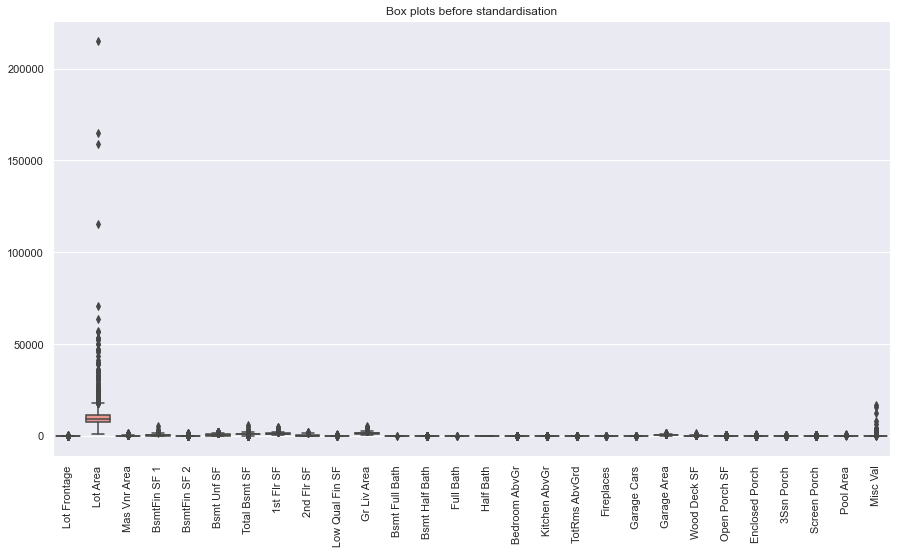

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(data = iowa_numeric_df)
plt.xticks(rotation = 90);
plt.title('Box plots before standardisation');

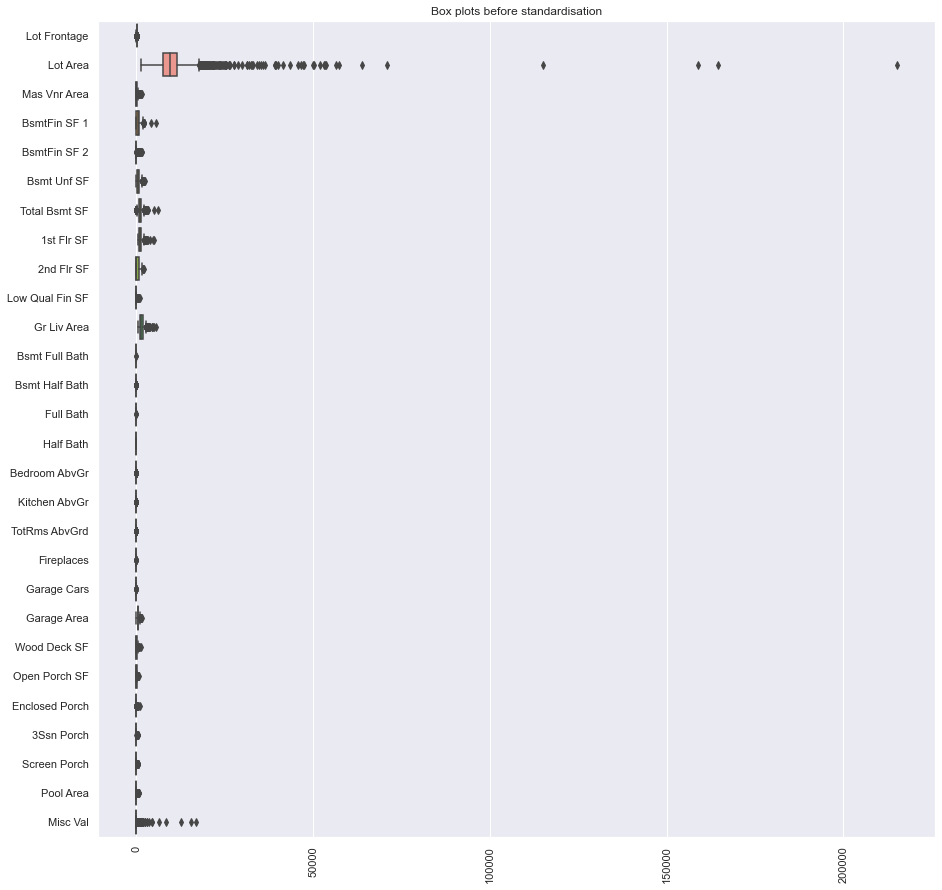

In [30]:
plt.figure(figsize=(15,15))
sns.boxplot(data = iowa_numeric_df, orient='h')
plt.xticks(rotation = 90);
plt.title('Box plots before standardisation');

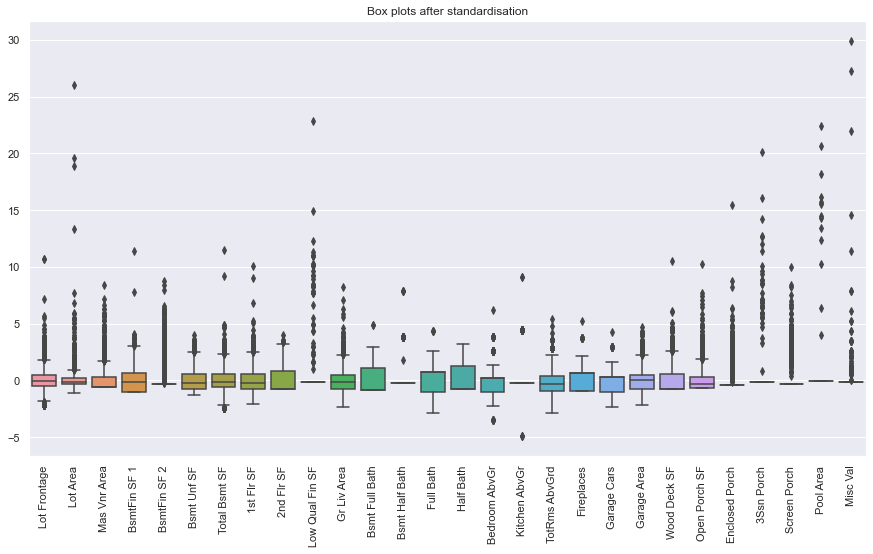

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(data = iowa_numeric_standard_df)
plt.xticks(rotation = 90);
plt.title('Box plots after standardisation');

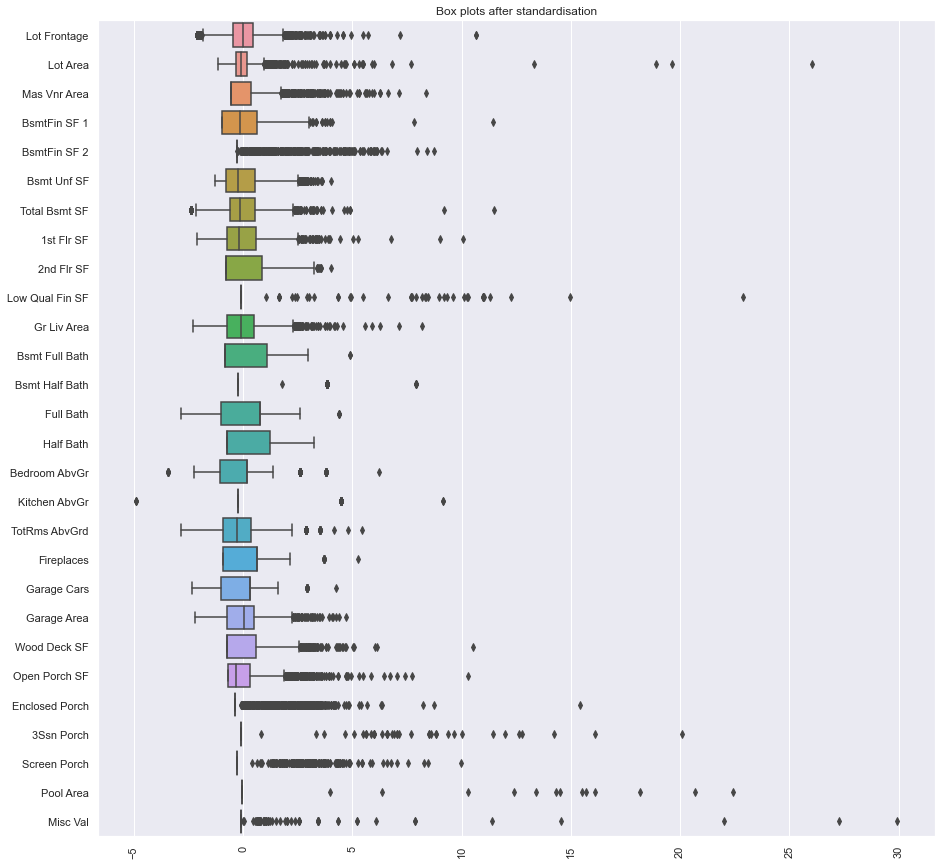

In [32]:
plt.figure(figsize=(15,15))
sns.boxplot(data = iowa_numeric_standard_df, orient='h')
plt.xticks(rotation = 90);
plt.title('Box plots after standardisation');

<b>Observations</b>:
- The range of values for all columns is very different before standardization, eg Lot Area has a range 1300 - 215245. The boxplots of other variables are shortened because of this
- Before Standardization, Lot Area had a very high mean (10147) as compared to other features which were in 100s or 1000s
- Lot Area also has many outliers before standardisation, it has the furthest outlier from mean
- Before Standardization, Misc Val has many outliers
- After standardization, Misc Val, Lot Area have many outliers. Misc Val has furthest outlier from mean
- The feature with the farthest outlier seems to have changed from Lot Area to Misc Val after standardisation. This is probably because the range of Lot Area is very high and thus seems to have a outlier that is very far. But after scaling, when the scale between features becomes "comparable", Misc Val has furthest outlier
- After standardization, all features have a mean close to 0 and standard deviation close to 1
- Low Qual Fin SF ,Pool Area, 3Ssn Porch, BsmtFin SF 1 also have many outliers after standardisation

#### Sample distribution plot before and after standardisation

<AxesSubplot:xlabel='Gr Liv Area', ylabel='Count'>

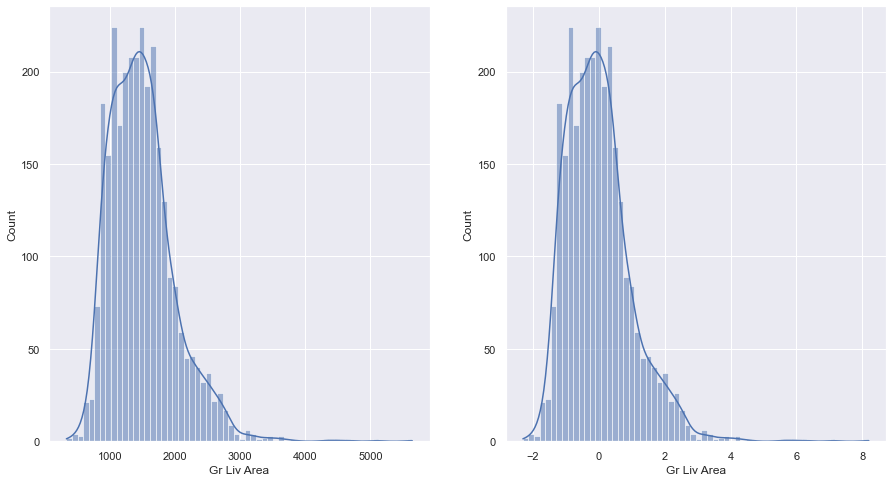

In [33]:
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(15,8))
sns.histplot(ax = ax[0], data=iowa_numeric_df, x = 'Gr Liv Area', kde = True)
sns.histplot(ax = ax[1], data = iowa_numeric_standard_df['Gr Liv Area'], kde = True)


The mean and standard deviation have been standardised to 0 and 1

## 2.3 Feature Selection

### 2.3.1 Mutual Information

Let us utilise Mututal Information to get the most important features. <br>
Blog referred: https://machinelearningmastery.com/feature-selection-for-regression-data/

In [34]:
# Create Y_train from sale price and X_train from standardized numeric dataset
from sklearn.feature_selection import SelectKBest, mutual_info_regression
X_train = iowa_numeric_standard_df
Y_train = iowa_df['SalePrice']


In [35]:
#We will use SelectKBest to get mutual information of all features
fs = SelectKBest(score_func=mutual_info_regression, k = 'all')
fs.fit(X_train, Y_train)
feat_mutual_info = pd.DataFrame({'feature': X_train.columns,
                                 'mutual_information': fs.scores_})
#Sort based on highest mutual information
feat_mutual_info = feat_mutual_info.sort_values(by = 'mutual_information', ascending=False)
feat_mutual_info

,feature,mutual_information
10,Gr Liv Area,0.495376
20,Garage Area,0.421246
6,Total Bsmt SF,0.392141
19,Garage Cars,0.383563
7,1st Flr SF,0.371193
13,Full Bath,0.254018
8,2nd Flr SF,0.214707
0,Lot Frontage,0.203403
17,TotRms AbvGrd,0.196310
2,Mas Vnr Area,0.176261


#### Plot mutual information

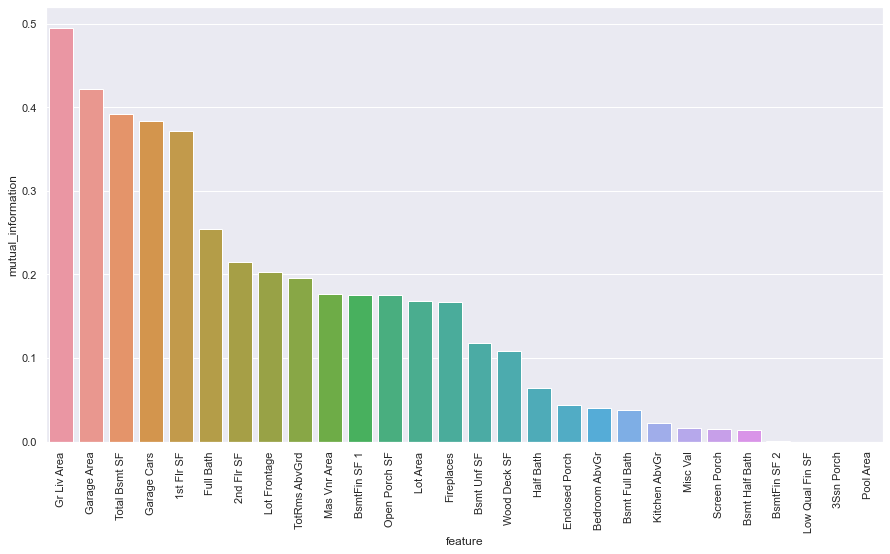

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(data = feat_mutual_info, x = 'feature', y = 'mutual_information')
plt.xticks(rotation = 90);

We can see features GR Liv Area, Garage Area, Garage Cars, 1st Flr SF, Lot Frontage etc have very high feature importance. This makes sense as all of these features are related to the area that a house has.

### 2.3.2 Top 5 features with mutual information

In [37]:
feat_mutual_info.head(5)

,feature,mutual_information
10,Gr Liv Area,0.495376
20,Garage Area,0.421246
6,Total Bsmt SF,0.392141
19,Garage Cars,0.383563
7,1st Flr SF,0.371193


Text(0.5, 1.0, 'Feature importance using Mutual Information')

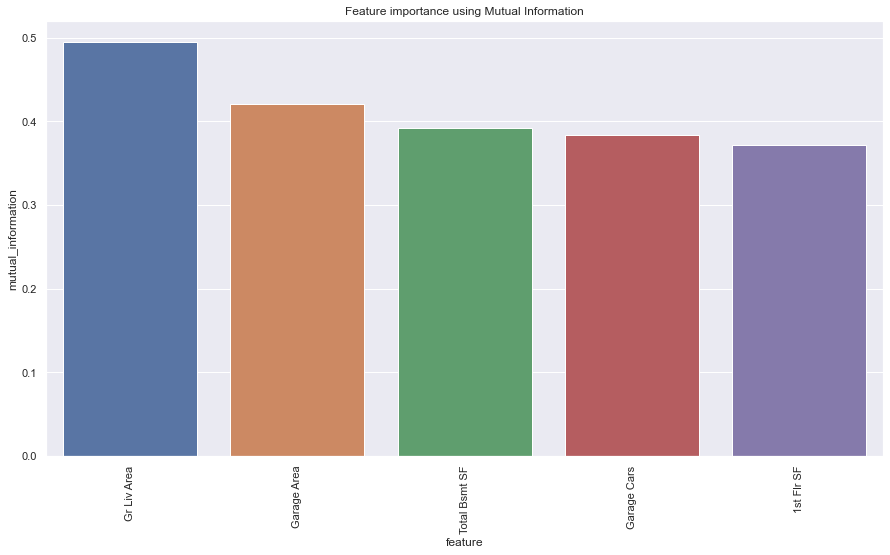

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(data = feat_mutual_info.head(5), x = 'feature', y = 'mutual_information')
plt.xticks(rotation = 90);
plt.title('Feature importance using Mutual Information')

### 2.3.3 Effect of top 5 features on Sale Price

The top 5 features are 
- Above Ground living area in square feet
- Garage Area in Sq ft
- Total Basement Sq ft
- Garage Cars (Size in car capacity)
- 1st Flr Sq ft

The top ranked feature is Ground Living Area in Sq Ft. Intuitively, I think these features have a positive effect on Sale Price. That is, as the value for these features increases, the sale price will increase as they are related to the area available for a particular house.

Let us check this hypothesis with correlation coefficient. If the correlation is positive, Sale Price will increase with increase in these variables

In [39]:
correlation = iowa_numeric_standard_df[['Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Garage Cars','1st Flr SF']].corrwith(Y_train)
correlation


Gr Liv Area      0.706780
Garage Area      0.640358
Total Bsmt SF    0.632420
Garage Cars      0.647877
1st Flr SF       0.621676
dtype: float64

We can see the correlation is positive, so the hypothesis that Sale Price will increase with increase in these column values is correct.